# Libs import

In [173]:
# load requires packages
pacman::p_load(MendelianRandomization, TwoSampleMR, MVMR,
               ieugwasr, gwasglue,
               data.table, plyr, dplyr, tidyr, meta, SciViews, qqman, comprehenr, cli, knitr,
               ggplot2, cowplot, plotly, ggrepel, egg, grid, gridExtra,
               optparse, metaCCA)
options(ieugwasr_api = 'gwas-api.mrcieu.ac.uk/')

# Global Variables

In [4]:
global_seed <- 314159265
output_dir <- "output/" # path where the results are saved
data_dir <- "data" # path to where you have the datasets saved

In [5]:
snpList_t2d <- read.csv(paste0(data_dir,"/paper-results/snpList_t2d.csv"))[,1]
snplist_bf <- read.csv(paste0(data_dir,"/paper-results/snpList_bf.csv"), header = FALSE)[-1,1]
snplist_bmi <- read.csv(paste0(data_dir,"/paper-results/snpList_bmi.csv"), header = FALSE)[-1,1]

ld_ref_file <- paste0(data_dir, "/LD_ref/EUR")
ld_mat_uk10k_file <- paste0(data_dir, "/LD_ref/UK10K_COHORT.20160215.sites.tab.gz")
plink_path <- genetics.binaRies::get_plink_binary()

full_method_list <- c("mr_egger_regression", "mr_weighted_median", "mr_ivw", "mr_ivw_fe", "mr_ivw_radial", "mr_raps")

In [6]:
id_als_2018 <- "ebi-a-GCST005647"
id_als_2021 <- "ebi-a-GCST90027164"
id_park_2019 <- "ieu-b-7"
id_chd <- "ieu-a-7"

id_t2d_2018 <- "ebi-a-GCST006867"
id_t2d_2021 <- "ebi-a-GCST90018926"
id_tc_2013 <- "ebi-a-GCST002221"
id_tc_2021 <- "ebi-a-GCST90018974"
id_bmi_2018a <- "ebi-a-GCST90029007"
id_bmi_2018b <- "ieu-b-40"

id_hdlc <- "ieu-a-299"
id_ldlc <- "ieu-a-300"
id_trig <- "ieu-a-302"

In [7]:
# from https://www.ebi.ac.uk/gwas/studies/GCST005647
als_file_2018 <- paste0(data_dir, "/gwas/ALS/29566793-GCST005647-EFO_0000253.h.tsv.gz")
# from https://www.ebi.ac.uk/gwas/studies/GCST90027164 (meilleur)
als_file_2021 <- paste0(data_dir, "/gwas/ALS/GCST90027164_buildGRCh37.tsv.gz")
# from https://www.ebi.ac.uk/gwas/studies/GCST009325
park_file_2019 <- paste0(data_dir, "/gwas/Park/GCST009325.h.tsv.gz")
# from https://www.ebi.ac.uk/gwas/studies/GCST90275127 (meilleur)
park_file_2023 <- paste0(data_dir, "/gwas/Park/GCST90275127.h.tsv.gz")

# from https://www.ebi.ac.uk/gwas/studies/GCST003116
chd_file <- paste0(data_dir, "/gwas/CHD/26343387-GCST003116-EFO_0000378.h.tsv.gz")

# from https://www.ebi.ac.uk/gwas/studies/GCST006867 (meilleur)
t2d_file_2018a <- paste0(data_dir, "/gwas/T2D/Xue_et_al_T2D_META_Nat_Commun_2018.gz")
# from http://diagram-consortium.org/downloads.html
t2d_file_2018b <- paste0(data_dir, "/gwas/T2D/Mahajan.NatGenet2018b.T2D.European.txt.gz")
# from https://www-ncbi-nlm-nih-gov.insb.bib.cnrs.fr/projects/gap/cgi-bin/analysis.cgi?study_id=phs001672.v11.p1&pha=4945
t2d_file_2020 <- paste0(data_dir, "/gwas/T2D/phs001672.pha004945.csv.gz")
# from https://t2d.hugeamp.org/dinspector.html?dataset=Suzuki2024_T2D_EU
t2d_file_2024 <- paste0(data_dir, "/gwas/T2D/EUR_Metal_LDSC-CORR_Neff.v2.txt.gz")

#from https://www.ebi.ac.uk/gwas/publications/24097068 (meilleur)
tc_file_2013 <- paste0(data_dir, "/gwas/TC/24097068-GCST002221-EFO_0004574.h.tsv.gz")
ldlc_file_2013 <- paste0(data_dir, "/gwas/LDLC/24097068-GCST002222-EFO_0004611.h.tsv.gz")
# from https://www.ebi.ac.uk/gwas/studies/GCST90239676 
tc_file_2021 <- paste0(data_dir, "/gwas/TC/GCST90239676.h.tsv.gz")
# from https://www.ebi.ac.uk/gwas/studies/GCST90239658
ldlc_file_2021 <- paste0(data_dir, "/gwas/LDLC/GCST90239658_buildGRCh37.tsv.gz")

# from https://www.ebi.ac.uk/gwas/studies/GCST002783
bmi_file_2015 <- paste0(data_dir, "/gwas/BMI/25673413-GCST002783-EFO_0004340.h.tsv.gz")
# from https://zenodo.org/records/1251813
bmi_file_2018a <- paste0(data_dir, "/gwas/BMI/bmi.giant-ukbb.meta-analysis.combined.23May2018.txt.gz")
# from https://www.ebi.ac.uk/gwas/studies/GCST006900 (meilleur)
bmi_file_2018b <- paste0(data_dir, "/gwas/BMI/Meta-analysis_Locke_et_al+UKBiobank_2018_UPDATED.txt.gz")

# from https://www.ebi.ac.uk/gwas/studies/GCST003435
bf_file_2016 <- paste0(data_dir, "/gwas/BF%/26833246-GCST003435-EFO_0007800.h.tsv.gz")

# from https://www.ebi.ac.uk/gwas/studies/GCST90025952
alpb_file_2021 <- paste0(data_dir, "/gwas/ALPB/34226706-GCST90025952-EFO_0004615.h.tsv.gz")

# from https://www.ebi.ac.uk/gwas/studies/GCST90041837
hc_file <- paste0(data_dir, "/gwas/HC/29892013-GCST90029030-EFO_0007822.h.tsv.gz")

# from https://www.thessgac.org/#!data/kuzq8
ea_file <- paste0(data_dir, "/gwas/EA/GWAS_EA_excl23andMe.txt.gz")

# from TwoSampleMR api
hdlc_file_api <- paste0(data_dir, "/gwas/HDLC/24097068-GCST002223-EFO_0004612.h.tsv.gz")
ldlc_file_api <- ldlc_file_2013
trig_file_api <- paste0(data_dir, "/gwas/TRIG/24097068-GCST002216-EFO_0004530.h.tsv.gz")

In [25]:
##
std_useful_cols <- c("chromosome", "base_pair_location", "effect_allele", "other_allele", "effect_allele_frequency", "beta", "standard_error", "p_value", "id", "Phenotype")
hm_useful_cols <- c("hm_rsid", "hm_chrom", "hm_pos", "hm_effect_allele", "hm_other_allele", "hm_effect_allele_frequency", "hm_beta", "standard_error", "p_value", "id", "Phenotype")
##

als_useful_cols_2018 <- c("hm_rsid", std_useful_cols)
als_useful_cols_2021 <- c("rsid", std_useful_cols)

park_useful_cols_2019 <- c("rsid", std_useful_cols)
park_useful_cols_2023 <- c("rsid", std_useful_cols)

chd_useful_cols <- hm_useful_cols

t2d_useful_cols_2018a <- c("SNP", "CHR", "BP", "A1", "A2", "frq_A1", "b", "se", "P", "id", "Phenotype", "N")
t2d_useful_cols_2018b <- c("SNP", "Chr", "Pos", "EA", "NEA", "EAF", "Beta", "SE", "Pvalue", "id", "Phenotype")
t2d_useful_cols_2020 <- c("SNP.ID", "Chr.ID", "Chr.Position", "Allele1", "Allele2", "effect_allele_frequency", "beta", "SE", "P.value", "id", "Phenotype", "Sample.size")

tc_useful_cols_2013 <- hm_useful_cols
ldlc_useful_cols_2013 <- hm_useful_cols
tc_useful_cols_2021 <- c("variant_id",  std_useful_cols, "n")
ldlc_useful_cols_2021 <- c("variant_id", std_useful_cols)

bmi_useful_cols_sumstat <- hm_useful_cols
#bmi_useful_cols_2018a <- 
bmi_useful_cols_2018b <- c("SNP", "CHR", "POS", "Tested_Allele", "Other_Allele", "Freq_Tested_Allele_in_HRS", "BETA", "SE", "P", "id", "Phenotype", "N")

bf_useful_cols_sumstat <- hm_useful_cols

alpb_useful_cols_2021 <- hm_useful_cols

hc_useful_cols <- hm_useful_cols

ea_useful_cols <- c("MarkerName", "CHR", "POS", "A1", "A2", "EAF", "Beta", "SE", "Pval", "id", "Phenotype")

# Pre-Processing dataframes

In [20]:
temp_file <- t2d_file_2020
temp_id <- "32541925-GCST010555"
temp_pheno <- "Type 2 diabetes"

In [21]:
temp_df <- fread(temp_file)

In [23]:
glimpse(temp_df)

Rows: 655,557
Columns: 14
$ `SNP ID`                <chr> "rs553642122", "rs7531543", "rs59192718", "rs7…
$ `P-value`               <dbl> 0.009862, 0.009649, 0.002186, 0.001852, 0.0061…
$ `Chr ID`                <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ `Chr Position`          <int> 790020, 917062, 922272, 920568, 917749, 920661…
$ Allele1                 <chr> "T", "C", "G", "A", "A", "T", "C", "G", "T", "…
$ Allele2                 <chr> "C", "A", "C", "G", "G", "C", "T", "C", "C", "…
$ `Minor allele`          <chr> "T", "C", "G", "A", "A", "T", "C", "G", "T", "…
$ beta                    <dbl> 0.1600, 0.1489, 0.2168, 0.2175, 0.1578, 0.1932…
$ SE                      <dbl> 0.0620, 0.0575, 0.0708, 0.0699, 0.0576, 0.0687…
$ `Coded Allele`          <chr> "T", "C", "G", "A", "A", "T", "C", "G", "T", "…
$ `Sample size`           <int> 826006, 1023280, 1023280, 1023280, 1023280, 10…
$ id                      <chr> "32541925-GCST010555", "32541925-GCST010555", …
$ Phenotype   

In [24]:
print_col_names(temp_df)

"SNP.ID", "P.value", "Chr.ID", "Chr.Position", "Allele1", "Allele2", "Minor.allele", "beta", "SE", "Coded.Allele", "Sample.size", "id", "Phenotype", "effect_allele_frequency"

In [19]:
add_pheno_id_in_file(temp_file, temp_df, temp_id, temp_pheno)

# Load scripts

In [174]:
source("scripts/00_utilitary.R")
source("scripts/01_data_import.R")
source("scripts/02_MR_methods.R")
source("scripts/03_plotting.R")
source("scripts/04_run_MR.R")
# from https://github.com/MRCIEU/PhenoSpD
source("scripts/SpD.r")

# MR ALS

## Type 2 diabetes

In [ ]:
res_list_t2d <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                            exposure_id = t2d_file_2018a, outcome_id = als_file_2018, 
                            exposure_useful_cols = t2d_useful_cols_2018a, 
                            outcome_useful_cols = als_useful_cols_2018,
                            snplist = snpList_t2d, paper_results = "t2 d_results.csv",
                            method_list = full_method_list)

In [ ]:
res_list_t2d <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                            exposure_id = t2d_file_2018a, outcome_id = als_file_2021, 
                            exposure_useful_cols = t2d_useful_cols_2018a, 
                            outcome_useful_cols = als_useful_cols_2021)

In [39]:
dat_t2d <- res_list_t2d$data
export_genetic_variant_associations(data_t2d, FALSE)

## Total Cholesterol

In [ ]:
res_tc_2021 <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                            exposure_id = tc_file_2013, outcome_id = als_file_2021, 
                            exposure_useful_cols = tc_useful_cols_2013, 
                            outcome_useful_cols = als_useful_cols_2021,
                            paper_results = "tc_results.csv", method_list = full_method_list)

In [ ]:
res_tc <- global_uv(FALSE, FALSE, tc_file_2013, als_file_2021,
                    tc_useful_cols_2013, als_useful_cols_2021)

In [ ]:
res_ldlc <- global_uv(FALSE, FALSE, ldlc_file_2013, als_file_2021,
                      ldlc_useful_cols_2013, als_useful_cols_2021)

## BMI

In [ ]:
dat_bmi <- data_import(api_use_ex = FALSE, api_use_out = FALSE,
                        exposure_id = bmi_file_2022, outcome_id = als_file_2021, 
                        exposure_useful_cols = bmi_useful_cols_2022, outcome_useful_cols = als_useful_cols_2021)

In [ ]:
res_bmi <- run_all_mr(dat_bmi)
res_bmi <- plotting_and_sensitivity_analysis(res = res_bmi, dat = dat_bmi, api_use_ex = FALSE)

In [ ]:
res_bmi

In [ ]:
dat_bmi <- data_import(api_use_ex = FALSE, api_use_out = FALSE,
                        exposure_id = bmi_file, outcome_id = als_file_2018, 
                        exposure_useful_cols = bmi_useful_cols, outcome_useful_cols = als_useful_cols_2018, 
                        snplist = snplist_bmi)

## BodyFat%

In [ ]:
res_bf <- global_uv(api_use_ex = FALSE, api_use_out = FALSE,
                    exposure_id = bf_file_2016, outcome_id = als_file_2018, 
                    exposure_useful_cols = bf_useful_cols_sumstat, outcome_useful_cols = als_useful_cols_2018, 
                    snplist = snplist_bf, paper_results = "bf_results.csv")

## Reverse Causality

In [ ]:
res_als_tc <- global_uv(FALSE, FALSE, outcome_id = tc_file, exposure_id = als_file_2018,
                        outcome_useful_cols = tc_useful_cols, 
                        exposure_useful_cols = als_useful_cols_2018)

In [ ]:
kable(res_als_tc)

## HC

In [ ]:
res_hc <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                    exposure_id = hc_file, outcome_id = als_file_2021, 
                    exposure_useful_cols = hc_useful_cols, 
                    outcome_useful_cols = als_useful_cols_2021)

# MR Parkinson

## MV

In [ ]:
res_park_bmi_t2d_tc <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = FALSE,
                                exposure_id_list = c(bmi_file_2018b, t2d_file_2018a, tc_file_2021), 
                                outcome_id = park_file_2023,
                                exposure_useful_cols_list = data.frame(bmi_useful_cols_2018b, t2d_useful_cols_2018a, tc_useful_cols_2021),
                                outcome_useful_cols = park_useful_cols_2023)

In [ ]:
res_park_bmi_t2d_ldlc <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = FALSE,
                                exposure_id_list = c(bmi_file_2018b, t2d_file_2018a, ldlc_file_2021), 
                                outcome_id = park_file_2023,
                                exposure_useful_cols_list = data.frame(bmi_useful_cols_2018b, t2d_useful_cols_2018a, ldlc_useful_cols_2021),
                                outcome_useful_cols = park_useful_cols_2023)

## BMI

In [ ]:
res_bmi_park <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                          exposure_id = bmi_file_2018b, outcome_id = park_file_2023, 
                          exposure_useful_cols = bmi_useful_cols_2018b, 
                          outcome_useful_cols = park_useful_cols_2023)

In [ ]:
# Test for reverse causality
res_park_bmi <- global_uv(api_use_ex = FALSE, api_use_out = FALSE,
                          exposure_id = park_file_2023, outcome_id = bmi_file_2018b,
                          exposure_useful_cols = park_useful_cols_2023,
                          outcome_useful_cols = bmi_useful_cols_2018b,
                          run_mr_presso = TRUE,
                          method_list = c("mr_wald_ratio", "mr_egger_regression", "mr_simple_median", "mr_weighted_median", "mr_ivw", "mr_ivw_mre", "mr_ivw_fe", "mr_raps"))

## T2D

In [31]:
res_t2d_park <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                          exposure_id = t2d_file_2018a, outcome_id = park_file_2019, 
                          exposure_useful_cols = t2d_useful_cols_2018a, 
                          outcome_useful_cols = park_useful_cols_2019)

Clumping h7fpnD, 5983 variants, using EUR population reference

Removing 5863 of 5983 variants due to LD with other variants or absence from LD reference panel

Harmonising Type 2 diabetes || id:ebi-a-GCST006867 (ebi-a-GCST006867) and Parkinson disease || id:GCST009325 (GCST009325)

Removing the following SNPs for being palindromic with intermediate allele frequencies:
rs13234269, rs6494307, rs7619041

Analysing 'ebi-a-GCST006867' on 'GCST009325'




Radial IVW

                   Estimate  Std.Error  t value  Pr(>|t|)
Effect (Mod.2nd) 0.03258841 0.03076947 1.059115 0.2895475
Iterative        0.03258841 0.03076947 1.059115 0.2895475
Exact (FE)       0.03319794 0.02677572 1.239852 0.2150300
Exact (RE)       0.03306067 0.03135664 1.054343 0.2939358


Residual standard error: 1.149 on 115 degrees of freedom

F-statistic: 1.12 on 1 and 115 DF, p-value: 0.292
Q-Statistic for heterogeneity: 151.8653 on 115 DF , p-value: 0.0121034

 Outliers detected 
Number of iterations = 2


Warning message in mr.raps.overdispersed.robust(b_exp, b_out, se_exp, se_out, loss.function, :
“The estimated overdispersion parameter is very small. Consider using the simple model without overdispersion.”



Radial IVW

                   Estimate  Std.Error  t value  Pr(>|t|)
Effect (Mod.2nd) 0.03258841 0.03076947 1.059115 0.2895475
Iterative        0.03258841 0.03076947 1.059115 0.2895475
Exact (FE)       0.03319794 0.02677572 1.239852 0.2150300
Exact (RE)       0.03306067 0.03088491 1.070447 0.2866595


Residual standard error: 1.149 on 115 degrees of freedom

F-statistic: 1.12 on 1 and 115 DF, p-value: 0.292
Q-Statistic for heterogeneity: 151.8653 on 115 DF , p-value: 0.0121034

 Outliers detected 
Number of iterations = 2


Warning message in ggplot2::geom_segment(ggplot2::aes(x = 0, xend = cos(atan(r_object$IVW.coef[1])) * :
“All aesthetics have length 1, but the data has 11 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in ggplot2::geom_segment(ggplot2::aes(x = 0, xend = cos(atan(r_object$egger.coef[2, :
“All aesthetics have length 1, but the data has 11 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


ERROR: Error in eval(substitute(select), nl, parent.frame()): objet 'intercept' introuvable


In [27]:
res_t2d_park_2020 <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                            exposure_id = t2d_file_2020, outcome_id = park_file_2019, 
                            exposure_useful_cols = t2d_useful_cols_2020, 
                            outcome_useful_cols = park_useful_cols_2019)

Warning message in format_data(df, type = type, snps = snplist, header = TRUE, snp_col = useful_cols[1], :
“eaf column is not numeric. Coercing...”
Clumping DIZ36q, 37247 variants, using EUR population reference

Removing 36924 of 37247 variants due to LD with other variants or absence from LD reference panel

Harmonising Type 2 diabetes || id:32541925-GCST010555 (32541925-GCST010555) and Parkinson disease || id:GCST009325 (GCST009325)

Removing the following SNPs for being palindromic with intermediate allele frequencies:
rs10406327, rs10471048, rs10830963, rs10849094, rs10937721, rs11195508, rs11602873, rs117316450, rs11967262, rs12741141, rs12951967, rs1475655, rs1562398, rs17684074, rs2080090, rs2103132, rs2297508, rs2410767, rs243018, rs256904, rs28429551, rs2890156, rs34245505, rs34341, rs3757969, rs4083914, rs4845987, rs4865436, rs501510, rs545608, rs55853916, rs56348580, rs62112763, rs6459733, rs6728523, rs703981, rs7220167, rs74804697, rs75756987, rs76223293, rs838735, rs93046


Radial IVW

                    Estimate  Std.Error    t value  Pr(>|t|)
Effect (Mod.2nd) -0.03172183 0.03217431 -0.9859365 0.3241643
Iterative        -0.03172183 0.03217431 -0.9859365 0.3241643
Exact (FE)       -0.03229780 0.02702478 -1.1951180 0.2320409
Exact (RE)       -0.03214578 0.03367857 -0.9544878 0.3406630


Residual standard error: 1.191 on 279 degrees of freedom

F-statistic: 0.97 on 1 and 279 DF, p-value: 0.325
Q-Statistic for heterogeneity: 395.4574 on 279 DF , p-value: 5.374388e-06

 Outliers detected 
Number of iterations = 2


Warning message in mr.raps.overdispersed.robust(b_exp, b_out, se_exp, se_out, loss.function, :
“The estimated overdispersion parameter is very small. Consider using the simple model without overdispersion.”



Radial IVW

                    Estimate  Std.Error    t value  Pr(>|t|)
Effect (Mod.2nd) -0.03172183 0.03217431 -0.9859365 0.3241643
Iterative        -0.03172183 0.03217431 -0.9859365 0.3241643
Exact (FE)       -0.03229780 0.02702478 -1.1951180 0.2320409
Exact (RE)       -0.03214578 0.03372682 -0.9531222 0.3413532


Residual standard error: 1.191 on 279 degrees of freedom

F-statistic: 0.97 on 1 and 279 DF, p-value: 0.325
Q-Statistic for heterogeneity: 395.4574 on 279 DF , p-value: 5.374388e-06

 Outliers detected 
Number of iterations = 2


Warning message in export_forest_plot(dat, dir):
“Too many SNPs to plot”
Warning message in export_loo_plot(dat, dir):
“Too many SNPs to plot”
Warning message in ggplot2::geom_segment(ggplot2::aes(x = 0, xend = cos(atan(r_object$IVW.coef[1])) * :
“All aesthetics have length 1, but the data has 25 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in ggplot2::geom_segment(ggplot2::aes(x = 0, xend = cos(atan(r_object$egger.coef[2, :
“All aesthetics have length 1, but the data has 25 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


ERROR: Error in eval(substitute(select), nl, parent.frame()): objet 'intercept' introuvable


## TC

In [ ]:
res_tc_park <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                          exposure_id = tc_file_2021, outcome_id = park_file_2019, 
                          exposure_useful_cols = tc_useful_cols_2021, 
                          outcome_useful_cols = park_useful_cols_2019)

# MultiVariate MR

## Final

In [ ]:
res_t2d_ldlc_bmi <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = FALSE,
                            exposure_id_list = c(bmi_file_2018b, t2d_file_2018a, ldlc_file_2021),
                            exposure_useful_cols_list = data.frame(bmi_useful_cols_2018b, t2d_useful_cols_2018a, ldlc_useful_cols_2021),
                            outcome_id = als_file_2021, 
                            outcome_useful_cols = als_useful_cols_2021, run_mr_presso = FALSE)

In [ ]:
res_t2d_tc_bmi <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = FALSE,
                            exposure_id_list = c(bmi_file_2018b, t2d_file_2018a, tc_file_2021),
                            exposure_useful_cols_list = data.frame(bmi_useful_cols_2018b, t2d_useful_cols_2018a, tc_useful_cols_2021),
                            outcome_id = als_file_2021, 
                            outcome_useful_cols = als_useful_cols_2021, run_mr_presso = FALSE)

In [ ]:
res_t2d_tc_bmi <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = FALSE,
                            exposure_id_list = c(bmi_file_2018b, t2d_file_2018a, tc_file_2013),
                            exposure_useful_cols_list = data.frame(bmi_useful_cols_2018b, t2d_useful_cols_2018a, tc_useful_cols_2013),
                            outcome_id = als_file_2021, 
                            outcome_useful_cols = als_useful_cols_2021, run_mr_presso = TRUE)

In [ ]:
print_mvmr_res(res_t2d_tc_bmi)

In [ ]:
res_lipids_api <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = TRUE,
                            exposure_id_list = c(id_hdlc, id_ldlc, id_trig),
                            outcome_id = id_chd)

In [ ]:
res_lipids_local <- global_mv(run_all_uvmr = FALSE, run_mvmr = TRUE, api_use = FALSE,
                                exposure_id_list = c(hdlc_file_api, ldlc_file_api, trig_file_api), 
                                outcome_id = chd_file,
                                exposure_useful_cols_list = data.frame(hm_useful_cols, hm_useful_cols, hm_useful_cols),
                                outcome_useful_cols = chd_useful_cols)

In [ ]:
res_lipids2_local <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = FALSE,
                                exposure_id_list = c(ldlc_file_api, trig_file_api, alpb_file_2021), 
                                outcome_id = chd_file,
                                exposure_useful_cols_list = data.frame(hm_useful_cols, hm_useful_cols, hm_useful_cols),
                                outcome_useful_cols = chd_useful_cols)

In [ ]:
# TC + LDLC on ALS (Local)
res_tc_ldlc <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = FALSE,
                        exposure_id_list = c(tc_file_2013, ldlc_file_2013), 
                        outcome_id = als_file_2021,
                        exposure_useful_cols_list = data.frame(tc_useful_cols_2013, ldlc_useful_cols_2013),
                        outcome_useful_cols = als_useful_cols_2021)

In [ ]:
print_mvmr_res(res_tc_ldlc)

In [ ]:
# TC 2013 vs TC 2021 on ALS (Local)
res_tc_1_2 <- global_mv(run_all_uvmr = TRUE, run_mvmr = FALSE, api_use = FALSE,
                        exposure_id_list = c(tc_file_2013, tc_file_2021),
                        outcome_id = als_file_2021,
                        exposure_useful_cols_list = data.frame(tc_useful_cols_2013, tc_useful_cols_2021),
                        outcome_useful_cols = als_useful_cols_2021)

In [ ]:
# Diabete + Chol on ALS (Local)
res_t2d_tc <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = FALSE,
                            exposure_id_list = c(t2d_file_2018a, tc_file_2013), 
                            outcome_id = als_file_2021,
                            exposure_useful_cols_list = data.frame(t2d_useful_cols_2018a, tc_useful_cols_2013),
                            outcome_useful_cols = als_useful_cols_2021)

In [ ]:
print_mvmr_res(res_t2d_tc)

In [ ]:
# BMI + BF% on ALS (Local)
res_bmi_bf <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = FALSE,
                        exposure_id_list = c(bmi_file, bf_file),
                        exposure_useful_cols_list = data.frame(bmi_useful_cols, bf_useful_cols),
                        outcome_id = als_file_2018, outcome_useful_cols = als_useful_cols_2018, 
                        snplist = list(snplist_bmi, snplist_bf))

## Tests plot

In [16]:
# TC + LDLC on ALS (Local)
api_use <- FALSE
exposure_id_list <- c(tc_file_2013, ldlc_file_2013)
outcome_id <- als_file_2021
exposure_useful_cols_list <- data.frame(tc_useful_cols_2013, ldlc_useful_cols_2013)
outcome_useful_cols <- als_useful_cols_2021

snplist <- NULL # A tester peut-être
action <- 2
allow_palindromes <- 1
clump_r2 <- 0.001
clump_kb <- 10000
pval <- 5e-8

intercept <- FALSE
instrument_specific <- FALSE
plots <- FALSE

pop <- "EUR"
plink_bin <- genetics.binaRies::get_plink_binary()
bfile <- paste0(normalizePath(paste0(data_dir, "/LD_ref")), "/EUR")

## Parameters MR analysis
run_mvmr <- TRUE
# UV param
nboot <- 10000
over_dispersion <- FALSE
run_mr_presso <- FALSE
# MV param
intercept <- FALSE
instrument_specific <- TRUE
plots <- FALSE

In [ ]:
res_lipids_api <- global_mv(run_all_uvmr = FALSE, run_mvmr = TRUE, api_use = TRUE,
                            exposure_id_list = c(id_hdlc, id_ldlc, id_trig),
                            outcome_id = id_chd)

In [10]:
res_mv <- res_lipids_api$mv
res_bind <- res_lipids_api$uv

In [ ]:
res <- bind_rows(res_mv, res_bind) %>%
        group_by(id.exposure) %>%
        mutate(group = cur_group_id(),
                group = group + 0.2 * (row_number() - 1)) %>%
        mutate(label = paste("P-value:", signif(pval, digits = 3), "\n#SNPs:", nsnp))

# Plotting
ggplot(res, aes(x = or, y = group, color = mv)) +
        geom_point(size = 3) +
        geom_errorbar(aes(xmin = or_lci95, xmax = or_uci95), width = 0.05) +
        scale_color_manual(values = c("blue", "red")) +
        scale_y_continuous(breaks = 1:length(unique(res$exposure)) + 0.05, 
                        labels = unique(res$exposure)) +
        geom_vline(xintercept = 1, linetype = "dashed", color = "gray") +
        labs(color = "MV", x = paste0("Estimate (95% CI) on ", res$outcome[1]), y = "") +
        # Add annotations as text on the side
        geom_text(aes(x = max(or_uci95) + 0.1, label = label), 
                hjust = 0, vjust = 0.3, size = 4, color = "black") +
        # Adjust the x-axis limits to make space for the annotations
        xlim(min(res$or_lci95), max(res$or_uci95) + 1.5) +
        theme(length(unique(res$exposure))/2)

In [ ]:
res <- bind_rows(res_mv, res_bind) %>%
        group_by(id.exposure) %>%
        fill(everything(), .direction = "down")

res$mv <- factor(res$mv, levels = c(TRUE, FALSE))
res$exposure <- factor(res$exposure, levels = res_mv$exposure)

model_names = c('TRUE' = "Multivariable", 'FALSE' = "Univariable")

# Create the plot
plot <- ggplot(res, aes(x = or, y = exposure, color = mv)) +
  geom_point(shape = 15, size = 4) +  # Fixed size for points
  geom_errorbarh(aes(xmin = or_lci95, xmax = or_uci95), height = 0.1) +
  geom_vline(xintercept = 1, linetype = "dashed") +
  scale_color_manual(values = c("blue", "red")) +
  facet_wrap(~ mv, scales = "free_y", ncol = 1, strip.position = "right", 
             labeller = labeller(mv = model_names)) +
  labs(x = paste("Odds Ratio (with 95% CI) on ", res$outcome[1], " for each trait"),
       y = "",
       title = "Traits") +
  theme_minimal() +
  theme(plot.background = element_rect(fill = "white"),
        panel.grid.major = element_blank(), # Remove grid
        panel.grid.minor = element_blank(), # Remove minor grid
        panel.border = element_blank(), # Remove border
        axis.line.x = element_line(color = "black"), # Keep only x-axis
        axis.text.y = element_text(size = 10, hjust = 0), # Display y-axis text for traits
        axis.ticks.y = element_blank(), # Remove y-axis ticks
        legend.position = "none", # Remove legend
        strip.text = element_text(face = "bold", size = 14, hjust = 0), # Shift titles left
        plot.title = element_text(face = "bold", size = 16, hjust = -0.3)) # Shift plot title left


# Prepare the table with Odds Ratios [95% CI] and P-values
data_table <- res %>%
     mutate('Odds Ratio [95% CI]' = sprintf("%.2f [%.2f, %.2f]", or, or_lci95, or_uci95),
            'P-value' = format(pval, scientific = TRUE, digits = 3),
            'SNPs' = paste0(nsnp, " SNPs")) %>%
     select(exposure, mv, 'Odds Ratio [95% CI]', 'P-value', 'SNPs') %>%
     # Convert to long format for table presentation
     pivot_longer(cols = c('Odds Ratio [95% CI]', 'P-value', 'SNPs'), 
                  names_to = "Metric", values_to = "Value")

# Generate the table plot
table_plot <- ggplot(data_table, aes(x = Metric, y = exposure, label = Value, color = mv)) +
  geom_text(size = 4, hjust = 0) +
  facet_wrap(~ mv, scales = "free_y", ncol = 1) +
  scale_color_manual(values = c("blue", "red")) +
  theme_void() +
  theme(plot.background = element_rect(fill = "white"),
        strip.text = element_blank(),
        panel.spacing.y = unit(1, "lines"),
        plot.margin = margin(0, 0, 0, 0, "cm"),
        legend.position = "none") # Remove legend

# Add column headers manually by creating a small table
headers <- data.frame(
  Metric = c("Odds Ratio [95% CI]", "P-value", "SNPs"),
  y = 1,  # Dummy y value
  label = c("OR [95% CI]", "P-value", "SNPs")
)

header_plot <- ggplot(headers, aes(x = Metric, y = y, label = label)) +
  geom_text(size = 5, hjust = 0, fontface = "bold") +
  theme_void() +
  theme(plot.background = element_rect(fill = "white"),
        plot.margin = margin(0, 0, 0, 0, "cm"))

# Combine the headers, table, and plot
final_plot <- plot_grid(
  plot, 
  plot_grid(header_plot, table_plot, nrow = 2, rel_heights = c(0.1, 1), align = 'v'), 
  nrow = 1,
  rel_widths = c(1.5, 1))

# Export each plot as a PNG image
dir <- paste0(output_dir, gsub("[ /]", "-", res$outcome[1]))
if (!dir.exists(dir)) dir.create(dir, recursive = TRUE)

if (api_use) {
        ext <- "API"
} else {
        ext <- "local"
}

filename <- paste0(dir,
                "/MVMR_plot", 
                "_",
                gsub(" ", "_", sapply(strsplit(na.omit(levels(res$exposure)), "\\|"), 
                        function(x) x[1]) %>% paste(collapse = "")),
                ext,
                ".png")

# Save or display the plot
output_width <- 12  # Width in inches
output_height <- 6  # Height in inches
ggsave(filename, final_plot, width = output_width, height = output_height, dpi = 300)

In [ ]:
res_list <- global_mv(run_all_uvmr = TRUE, run_mvmr = TRUE, api_use = TRUE,
                            exposure_id_list = c(id_hdlc, id_ldlc, id_trig),
                            outcome_id = id_chd)
res <- res_list$res
dat <- res_list$dat
api_use_ex <- res_list$api_use_ex
param_mr <- res_list$param_mr
method_list <- res_list$method_list

In [186]:
if (api_use_ex) {
        ext <- "_API"
} else {
        ext <- "_local"
}

# Create the output directory if it doesn't exist
dir <- paste0(output_dir,
                gsub("[ /]", "-", dat$outcome[1]), 
                "/", 
                gsub("[ /]", "-", dat$exposure[1]),
                ext)
if (!dir.exists(dir)) dir.create(dir, recursive = TRUE)

In [228]:
plot <- ggplot(generate_odds_ratios(res), aes(x = or, y = method)) +
        geom_point(shape = 15, size = 4, color = 'red') +  # Fixed size for points
        geom_errorbarh(aes(xmin = or_lci95, xmax = or_uci95), height = 0.1, color = 'red') +
        geom_vline(xintercept = 1, linetype = "dashed", color = "gray") +
        labs(x = paste("Odds ratio (95% CI) for ", 
                        res$exposure[1], 
                        " on ",
                        res$outcome[1]), 
                y = "",
                title = "Methods") +
        #theme_bw()
        theme_minimal() +
        theme(plot.background = element_rect(fill = "white"),
                panel.grid.major = element_blank(), # Remove grid
                panel.grid.minor = element_blank(), # Remove minor grid
                panel.border = element_blank(), # Remove border
                axis.line.x = element_line(color = "black"), # Keep only x-axis
                axis.text.y = element_text(size = 10, hjust = 0), # Display y-axis text for traits
                axis.ticks.y = element_blank(), # Remove y-axis ticks
                legend.position = "none", # Remove legend
                strip.text = element_text(face = "bold", size = 14, hjust = 0), # Shift titles left
                plot.title = element_text(face = "bold", size = 16, hjust = -0.7)) # Shift plot title left

# Prepare the table with Odds Ratios [95% CI] and P-values
data_table <- res %>%
     mutate('Odds Ratio [95% CI]' = sprintf("%.2f [%.2f, %.2f]", or, or_lci95, or_uci95),
            'P-value' = format(pval, digits = 4),
            'SNPs' = paste0(nsnp, " SNPs")) %>%
     select(method, 'Odds Ratio [95% CI]', 'P-value', 'SNPs') %>%
     # Convert to long format for table presentation
     pivot_longer(cols = c('Odds Ratio [95% CI]', 'P-value', 'SNPs'), 
                  names_to = "Metric", values_to = "Value")

# Generate the table plot
table_plot <- ggplot(data_table, aes(x = Metric, y = method, label = Value)) +
  geom_text(size = 4, hjust = 0) +
  theme_void() +
  theme(plot.background = element_rect(fill = "white"),
        strip.text = element_blank(),
        panel.spacing.y = unit(1, "lines"),
        plot.margin = margin(0, 0, 0, 0, "cm"),
        legend.position = "none") # Remove legend

# Add column headers manually by creating a small table
headers <- data.frame(
  Metric = c("Odds Ratio [95% CI]", "P-value", "SNPs"),
  y = 1,  # Dummy y value
  label = c("OR [95% CI]", "P-value", "SNPs")
)

header_plot <- ggplot(headers, aes(x = Metric, y = y, label = label)) +
  geom_text(size = 5, hjust = 0, fontface = "bold") +
  theme_void() +
  theme(plot.background = element_rect(fill = "white"),
        plot.margin = margin(0, 0, 0, 0, "cm"))

# Combine the headers, table, and plot
final_plot <- plot_grid(
  plot, 
  plot_grid(header_plot, table_plot, nrow = 2, rel_heights = c(0.1, 1), align = 'v'), 
  nrow = 1,
  rel_widths = c(1.5, 1))

filename <- paste0(dir, "/mr_results_plot.png")

# Save or display the plot
output_width <- 12  # Width in inches
output_height <- 6  # Height in inches
ggsave(filename, final_plot, width = output_width, height = output_height, dpi = 300)

# Autres

## T2D on Lipids

In [ ]:
dat_t2d_tc <- data_import(api_use_ex = FALSE, api_use_out = FALSE, 
                            exposure_id = t2d_file_2018a, outcome_id = tc_file_2021, 
                            exposure_useful_cols = t2d_useful_cols_2018a, 
                            outcome_useful_cols = tc_useful_cols_2021)

In [ ]:
res_list_t2d_ldlc <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                            exposure_id = t2d_file_2018a, outcome_id = ldlc_file_2021, 
                            exposure_useful_cols = t2d_useful_cols_2018a, 
                            outcome_useful_cols = ldlc_useful_cols_2021)

## Plot GWAS

In [ ]:
dat_t2d <- data_import(api_use_ex = TRUE, api_use_out = TRUE, 
                        exposure_id = id_t2d_2018, outcome_id = id_als_2018) %>%
           distinct(SNP, .keep_all = TRUE) # Remove duplicates SNPs
ex_dat_t2d <- tophits(id = id_t2d_2018, pval = 5e-07, clump = 0)

In [ ]:
plot_manhattan_snp(snpList_t2d, dat_t2d, ex_dat_t2d)

In [ ]:
fig_qq(pvalues = mv_dat$exposure_pval[,2], ymax = 175, point_size = 2)

## Import LD Matrix of UKBB

In [ ]:
dat_tc_api <- global_uv(TRUE, TRUE,
                        id_tc_2013_2, id_als_2018,
                        over_dispersion = FALSE)

In [ ]:
missing_snps <- setdiff(dat_tc_api$SNP, ld_reflookup(dat_tc_api$SNP))

In [ ]:
query_dat <- subset(dat_tc_api, SNP %in% missing_snps) %>% 
                rename(CHR = chr, POS = pos) %>%
                select(CHR, POS, SNP) %>%
                data.table()            

In [ ]:
locus_dir <- file.path(tempdir())

In [ ]:
query_dat

In [ ]:
LD_list <- echoLD:::get_LD_UKB(query_dat = query_dat, locus_dir = locus_dir)

In [ ]:
read.delim(locus_dir)

In [ ]:
unlink(locus_dir)

In [ ]:
bucket <- aws.s3::get_bucket(bucket = "s3://broad-alkesgroup-ukbb-ld/")

In [ ]:
lapply(bucket, function(x) x$Key) %>% glimpse()

## Retrieve SNP ids from chr:pos with biomaRt

In [ ]:
library(biomaRt)
listEnsembl()

In [ ]:
snpMart <- useEnsembl(biomart = "snps", dataset = "hsapiens_snp")

In [ ]:
listFilters(snpMart) %>% head()

In [ ]:
listAttributes(snpMart) %>% head()

In [ ]:
temp1 <- head(temp)

In [ ]:
coords <- temp1[, c('Chr', 'Pos')] %>% as.list()

In [ ]:
glimpse(coords)

In [ ]:
# submit the query
getBM(attributes = c('refsnp_id', 'chrom_strand', 'chrom_start', 'allele'),
  filters = c('strand', 'start'), 
  values = coords, 
  mart = snpMart)

other method

In [6]:
library(vcfR)
# download all variant information for homo sapiens GRCh37 from Ensembl
destfile <- paste(data_dir, "/LD_ref/1000GENOMES-phase_3.vcf.gz",sep="")

In [ ]:
vcf <- read.vcfR(destfile)
vars = vcf@fix

In [ ]:
# format output file
vars = as.data.frame(vars[,c("CHROM","POS","ID","REF","ALT")])
vars$VAR_ID = paste(vars$CHROM,vars$POS,vars$REF,vars$ALT,sep="_")
vars = vars[,c("VAR_ID","ID")]
names(vars) = c("VAR_ID","rsID")

In [ ]:
write.table(vars,file=paste(output_dir,"VARID_rsID_map_file.txt",sep=""), append = F, quote = F, sep = "\t",
            eol = "\n", na = "NA", dec = ".", row.names = F,
            col.names = F, qmethod = c("escape", "double"))



## SIMEX Correction

In [ ]:
#Run the simex correction for each phenotype
#install.packages("simex")
#load package
library(simex) 

#get wellbeing instrument
exposure_dat <- extract_instruments(outcomes=c(1009), p1 = 5e-05)
exposure_dat <- clump_data(exposure_dat, clump_kb = 10000, clump_r2 = 0.001)

#create empty dataframe to store output
simexegger<-c()

cols<-c(2,7,299,300,301,798)

#run simex in a loop
for(i in 1:length(cols)){
	Vars<-cols[i]
	outcome_dat <- extract_outcome_data(exposure_dat$SNP, c(Vars), proxies = 1, rsq = 0.8, align_alleles = 1, palindromes = 1, maf_threshold = 0.3)
	dat <- harmonise_data(exposure_dat, outcome_dat, action = 2)
	str(dat)

	#Rename required columns
	dat$BetaXG<-dat$beta.exposure
	dat$seBetaXG<-dat$se.exposure
	dat$BetaYG<-dat$beta.outcome
	dat$seBetaYG<-dat$se.outcome
	BetaXG <- dat$BetaXG
	BetaYG <- dat$BetaYG
	seBetaXG <- dat$seBetaXG
	seBetaYG <- dat$seBetaYG


	BYG <- BetaYG*sign(BetaXG)# Pre-processing steps to ensure all gene--exposure estimates are positive
	BXG <- abs(BetaXG)         

	# MR-Egger regression (unweighted)
	Fit2 <- lm(BYG~BXG,x=TRUE,y=TRUE) 

	# Simulation extrapolation 
	mod.sim2 <- simex(Fit2,B=1000, measurement.error = seBetaXG, SIMEXvariable="BXG",fitting.method ="quad",asymptotic="FALSE") 
	mod2<-summary(mod.sim2)

	#extract results in beta format
	beta2<-mod2$coefficients$jackknife[2,1]
	se2<-mod2$coefficients$jackknife[2,2]
	p2<-mod2$coefficients$jackknife[2,4]

	#convert to odds ratios for categorical outcomes
	results2<-cbind("unweighted", beta2, se2, p2)
	colnames(results2) <- c("exposure", "b", "se", "pval") #following the MRBase naming convention
	results2<-data.frame(results2)
	results2$b<-as.numeric(as.character(results2$b))
	results2$se<-as.numeric(as.character(results2$se))
	results2$pval<-as.numeric(as.character(results2$pval))

	or<-generate_odds_ratios(results2)

	#extract confidence intervals and odds ratios
	or1<-or[1,7]
	lcior1<-or[1,8]
	ucior1<-or[1,9]
	lci2<-or[1,5]
	uci2<-or[1,6]

	#Save results
	output<-cbind(Vars, beta2, lci2, uci2, p2, or1, lcior1, ucior1)
	simexegger<-rbind(simexegger, output)
	colnames(simexegger) <- c("Exposure", "beta_unweighted", "lowerCI_unweighted", "upperCI_unweighted", "p_unweighted", "OR_unweighted", "lCIOR_unweighted", "uCIOR_unweighted")
	setwd("pathname")
	write.csv(simexegger, file="mreggersimex_wb-health.csv", row.names = FALSE)

}

# Final

## Generate data

In [ ]:
# T2D, TC, BMI on ALS (All SNP without second clumping)
dat_als_all <- data_import_mv(api_use = FALSE, second_clumping = FALSE,
                                exposure_id_list = c(bmi_file_2018b, t2d_file_2018a, tc_file_2021),
                                exposure_useful_cols_list = data.frame(bmi_useful_cols_2018b, t2d_useful_cols_2018a, tc_useful_cols_2021),
                                outcome_id = als_file_2021, outcome_useful_cols = als_useful_cols_2021)
save(dat_als_all, file = "data_formatted/dat_als_all.RData")

In [ ]:
# T2D, TC, BMI on ALS 
dat_als <- data_import_mv(api_use = FALSE,
                            exposure_id_list = c(bmi_file_2018b, t2d_file_2018a, tc_file_2021),
                            exposure_useful_cols_list = data.frame(bmi_useful_cols_2018b, t2d_useful_cols_2018a, tc_useful_cols_2021),
                            outcome_id = als_file_2021, outcome_useful_cols = als_useful_cols_2021)
save(dat_als, file = "data_formatted/dat_als.RData")

In [33]:
# T2D, TC, BMI on Park 
dat_park <- data_import_mv(api_use = FALSE,
                            exposure_id_list = c(bmi_file_2018b, t2d_file_2018a, tc_file_2021),
                            exposure_useful_cols_list = data.frame(bmi_useful_cols_2018b, t2d_useful_cols_2018a, tc_useful_cols_2021),
                            outcome_id = park_file_2019, outcome_useful_cols = park_useful_cols_2019)
save(dat_park, file = "data_formatted/dat_park.RData")

Warning message in .fun(piece, ...):
“Duplicated SNPs present in exposure data for phenotype 'Body mass index || id:30124842-GCST006900. Just keeping the first instance:
rs11576885
rs13598
rs2160421
rs3780697
rs3819262
rs573071
rs627141
rs7591686
rs969206”
Clumping 30124842-GCST006900, 41103 variants, using EUR population reference

Removing 40582 of 41103 variants due to LD with other variants or absence from LD reference panel

Identified 521 hits for trait Body mass index || id:30124842-GCST006900

Clumping ebi-a-GCST006867, 5983 variants, using EUR population reference

Removing 5863 of 5983 variants due to LD with other variants or absence from LD reference panel

Identified 120 hits for trait Type 2 diabetes || id:ebi-a-GCST006867

Warning message in .fun(piece, ...):
“Duplicated SNPs present in exposure data for phenotype 'Total cholesterol || id:34887591-GCST90239676. Just keeping the first instance:
rs2758118
rs151120166
rs2977607
rs28873693
rs559902987
rs143149010
rs11804026


In [ ]:
# Reproduction T2D
res_list_t2d <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                            exposure_id = t2d_file_2018a, outcome_id = als_file_2018, 
                            exposure_useful_cols = t2d_useful_cols_2018a, 
                            outcome_useful_cols = als_useful_cols_2018,
                            snplist = snpList_t2d, paper_results = "t2d_results.csv")
save(res_list_t2d, file = "data_formatted/res_list_t2d.RData")

In [ ]:
# Reproduction TC
res_list_tc <- global_uv(api_use_ex = FALSE, api_use_out = FALSE, 
                            exposure_id = tc_file_2013, outcome_id = als_file_2021, 
                            exposure_useful_cols = tc_useful_cols_2013, 
                            outcome_useful_cols = als_useful_cols_2021,
                            paper_results = "tc_results.csv")
save(res_list_tc, file = "data_formatted/res_list_tc.RData")

In [ ]:
# Reproduction BMI
dat_bmi <- data_import(api_use_ex = FALSE, api_use_out = FALSE,
                            exposure_id = bmi_file_2015, outcome_id = als_file_2018, 
                            exposure_useful_cols = bmi_useful_cols_sumstat, outcome_useful_cols = als_useful_cols_2018, 
                            snplist = snplist_bmi)
res_bmi <- run_all_mr(dat_bmi)
res_bmi <- plotting_and_sensitivity_analysis(res_bmi, dat_bmi, FALSE)
res_list_bmi <- list(data = dat_bmi, result = res_bmi)
save(res_list_bmi, file = "data_formatted/res_list_bmi.RData")

## Load data

In [131]:
load("data_formatted/dat_als.RData", verbose = TRUE)
load("data_formatted/dat_park.RData", verbose = TRUE)

load("data_formatted/res_list_t2d.RData", verbose = TRUE)
load("data_formatted/res_list_tc.RData", verbose = TRUE)
load("data_formatted/res_list_bmi.RData", verbose = TRUE)

Loading objects:
  dat_als
Loading objects:
  dat_park
Loading objects:
  res_list_t2d
Loading objects:
  res_list_tc
Loading objects:
  res_list_bmi


## Processing ALS

In [120]:
mv_dat <- dat_als$mv_dat
uv_dat <- dat_als$uv_dat

In [121]:
df <- bind_rows(res_list_t2d$result, res_list_tc$result, res_list_bmi$result)

In [122]:
df <- subset(df, method == "Inverse variance weighted")
df$replication <- "Replication of IVW analysis from study's GWAS"

In [123]:
paper_df <- lapply(c("t2d_results.csv", "tc_results.csv", "bmi_results.csv"), function(x) {
            row <- fread(paste0(data_dir, "/paper-results/", x)) %>%
            subset(method == "Inverse variance weighted")
            if (!"or" %in% colnames(row)) {row <- generate_odds_ratios(row)}
            return(row)
            }) %>% 
            bind_rows()
paper_df$replication <- "Paper's results for IVW"

In [124]:
df <- bind_rows(df, paper_df) %>%
    fill(c("id.outcome", "outcome"), .direction = "down")

In [125]:
res_mv <- TwoSampleMR::mv_multiple(mv_dat, intercept = FALSE, instrument_specific = FALSE, 5e-8)$result %>% 
        generate_odds_ratios()
res_mv$method <- "MVMR-IVW"
res_mv$replication <- "MVMR-IVW results on new GWAS"

In [126]:
df$exposure <- factor(sub(" \\|.*", "", df$exposure))
res_mv$exposure <- factor(sub(" \\|.*", "", res_mv$exposure))

In [127]:
df <- bind_rows(df, res_mv)

In [128]:
df$replication <- factor(df$replication, levels = c("Paper's results for IVW", "Replication of IVW analysis from study's GWAS", "MVMR-IVW results on new GWAS"))

## Plotting ALS

In [ ]:
plot_rucker_model(res_list_tc$result)

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


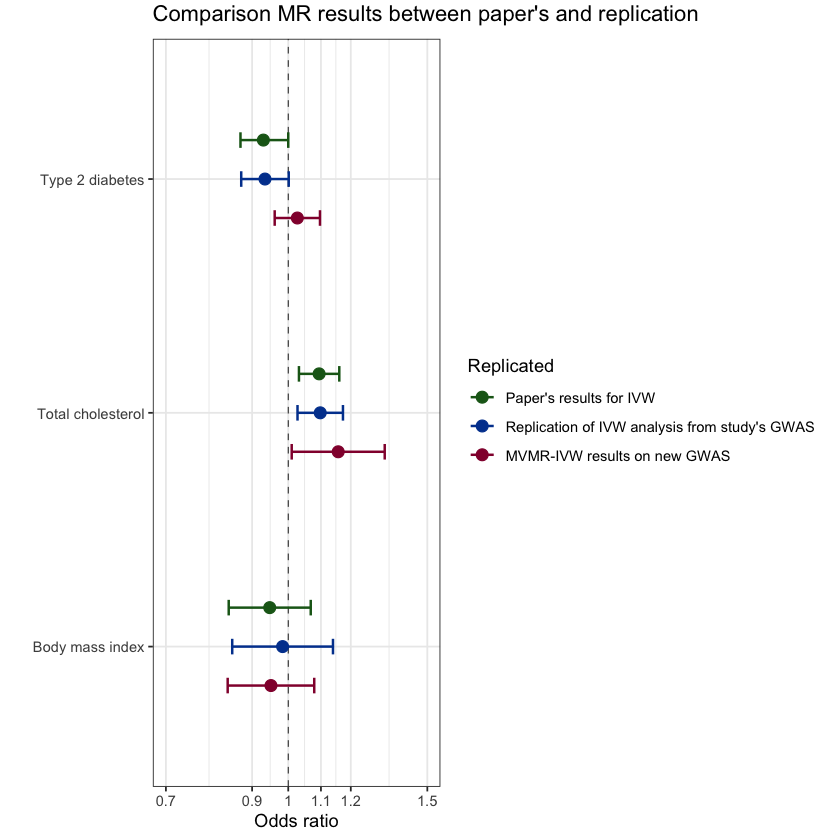

In [129]:
pos <- position_dodge(width = -.5)

p <- ggplot(df, aes(x = or, y = exposure, group = replication, color = replication)) + 
    geom_vline(aes(xintercept = 1.0), size = .25, linetype = "dashed") + 
    geom_errorbarh(aes(xmax = df[,'or_uci95'], xmin = df[,'or_lci95']), size = .7, height = .2, position=pos) +
    geom_point(position=pos, size = 3) +
    
    scale_x_log10(breaks = c(0.7,0.9,1.0,1.1,1.2,1.5), labels = c(0.7,0.9,1.0,1.1,1.2,1.5),
                       limits = c(0.7,1.5)) +
    
    ylab("") +
    xlab("Odds ratio") +

    scale_colour_manual(values = c("Paper's results for IVW" ="#1b651b","Replication of IVW analysis from study's GWAS" = "#00429d", 
                                "MVMR-IVW results on new GWAS" ="#93003a")) +
    guides(colour = guide_legend(title = "Replicated", reverse = FALSE)) +
    
    #annotate(geom = "text", y =1.1, x = log10(1.5), label = "", size = 1.5, hjust = 0) + 
    ggtitle("Comparison MR results between paper's and replication") +

    theme_bw() +
    theme(plot.title = element_text(vjust = 2))

print(p)

## Processing Park

In [100]:
mv_dat <- dat_park$mv_dat
uv_dat <- dat_park$uv_dat

In [101]:
res_list_park <- lapply(uv_dat, function(x) {
    x <- filter(x, mr_keep == TRUE)
    res_ivw <- TwoSampleMR::mr_ivw(b_exp = x$beta.exposure, b_out = x$beta.outcome, 
                                se_exp = x$se.exposure, se_out = x$se.outcome) %>% 
        generate_odds_ratios()
    res_ivw$exposure <- x$exposure[1]
    res_ivw$replication <- "IVW analysis on new GWAS"
    res_ivw$method <- "Inverse variance weighted"
    return(res_ivw)
})
df <- bind_rows(res_list_park)

In [102]:
res_park_egger <- lapply(uv_dat, function(x) {
    x <- filter(x, mr_keep == TRUE)
    res_egger <- mr_egger_regression(b_exp = x$beta.exposure, b_out = x$beta.outcome, 
                                     se_exp = x$se.exposure, se_out = x$se.outcome) 
    data.frame(method = "MR-Egger",
                nsnp = res_egger$nsnp,
                b = res_egger$b,
                se = res_egger$se,
                pval = res_egger$pval,
                exposure = x$exposure[1],
                replication = "MR-Egger analysis on new GWAS") %>% 
        generate_odds_ratios()
}) %>% bind_rows()

In [103]:
paper_df <- fread(paste0(data_dir, "/paper-results/park_results.csv"))
paper_df$replication <- "Paper's results for IVW"

In [104]:
df <- bind_rows(df, res_park_egger, paper_df)

In [105]:
res_mv <- TwoSampleMR::mv_multiple(mv_dat, intercept = FALSE, instrument_specific = FALSE, 5e-8)$result %>% 
        generate_odds_ratios()
res_mv$method <- "MVMR-IVW"
res_mv$replication <- "MVMR-IVW analysis on new GWAS"

In [106]:
df <- bind_rows(df, res_mv)
df$exposure <- factor(sub(" \\|.*", "", df$exposure))

In [107]:
df$replication <- factor(df$replication, levels = c("Paper's results for IVW", "IVW analysis on new GWAS", "MR-Egger analysis on new GWAS", "MVMR-IVW analysis on new GWAS"))
df <- as.data.frame(df)

## Plotting Park

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


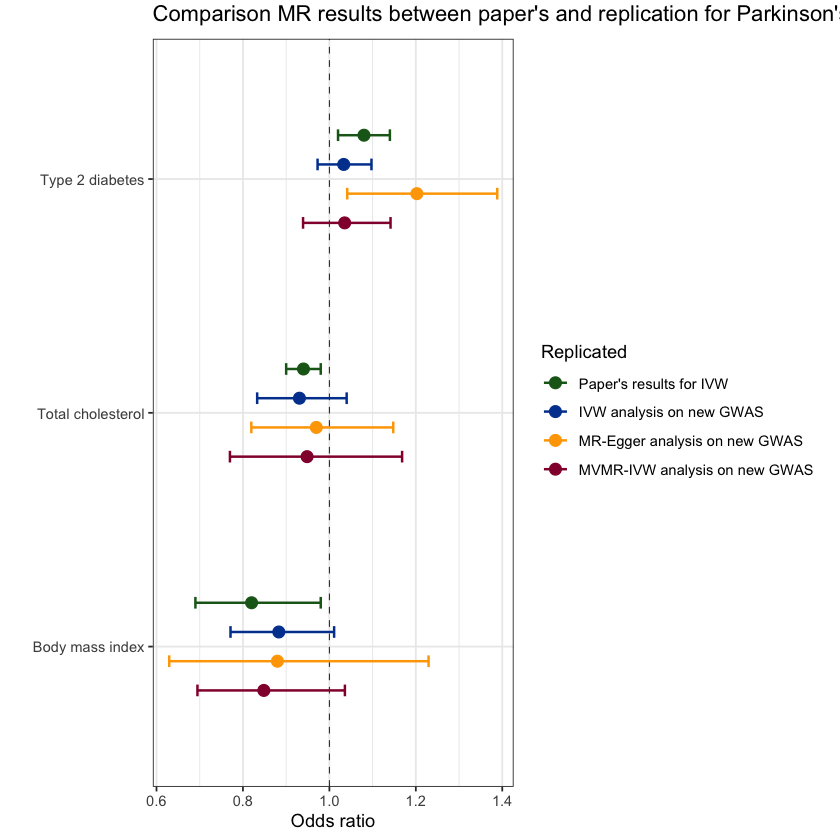

In [108]:
pos <- position_dodge(width = -.5)

p <- ggplot(df, aes(x = or, y = exposure, group = replication, color = replication)) + 
    geom_vline(aes(xintercept = 1.0), linewidth = .25, linetype = "dashed") + 
    geom_errorbarh(aes(xmax = df[,'or_uci95'], xmin = df[,'or_lci95']), size = .7, height = .2, position=pos) +
    geom_point(position=pos, size = 3) +
    
    #scale_x_log10(breaks = c(0.7,0.9,1.0,1.1,1.2,1.5), labels = c(0.7,0.9,1.0,1.1,1.2,1.5), limits = c(0.7,1.5)) +
    
    ylab("") +
    xlab("Odds ratio") +

    scale_colour_manual(values = c("#1b651b", "#00429d", '#ffa600', "#93003a")) +
    guides(colour = guide_legend(title = "Replicated", reverse = FALSE)) +
    
    #annotate(geom = "text", y =1.1, x = log10(1.5), label = "", size = 1.5, hjust = 0) + 
    ggtitle("Comparison MR results between paper's and replication for Parkinson's Disease") +

    theme_bw() +
    theme(plot.title = element_text(vjust = 2))

print(p)

## MVMR Sensitivity

In [233]:
mv_dat <- dat_als$mv_dat
uv_dat <- dat_als$uv_dat

In [234]:
res_list <- lapply(uv_dat, function(x) {
    x <- filter(x, mr_keep == TRUE)
    res_ivw <- TwoSampleMR::mr_ivw(b_exp = x$beta.exposure, b_out = x$beta.outcome, 
                                se_exp = x$se.exposure, se_out = x$se.outcome) %>% 
        generate_odds_ratios()
    res_ivw$id.exposure <- x$id.exposure[1]
    return(res_ivw)
})
res_bind <- bind_rows(res_list)
res_bind$mv <- FALSE

res_mv <- TwoSampleMR::mv_multiple(mv_dat, intercept = TRUE, instrument_specific = FALSE, 5e-8)$result %>% 
        generate_odds_ratios()
res_mv$mv <- TRUE

res <- export_mvmr_plot(res_mv, res_bind, FALSE)

Adding missing grouping variables: `id.exposure`


In [235]:
res_robust <- mvmr_robust(mv_dat) %>%
    mutate(method = "MVMR-robust", .) %>%
    select(method, everything()) %>%
    generate_odds_ratios()

In [236]:
res_mv <- TwoSampleMR::mv_multiple(mv_dat, intercept = TRUE, instrument_specific = FALSE, 5e-8)$result %>%
    mutate(method = "MVMR-IVW", .) %>%
    select(method, everything()) %>%
    generate_odds_ratios()

In [239]:
res_egger <- mvmr_egger() %>%
    mutate(method = "MVMR-Egger", .) %>%
    select(method, everything()) %>%
    generate_odds_ratios()

In [252]:
mr_mvegger(object = mr_mvinput(bx = mv_dat$exposure_beta, 
                                bxse = mv_dat$exposure_se,
                                by = mv_dat$outcome_beta,
                                byse = mv_dat$outcome_se),
            orientate = 1,
            correl = FALSE,
            distribution = "normal",
            alpha = 0.05)


Multivariable MR-Egger method
(variants uncorrelated, random-effect model)

Orientated to exposure : 1 
Number of Variants : 323 
------------------------------------------------------------------
    Exposure Estimate Std Error  95% CI        p-value
  exposure_1   -0.211     0.105 -0.416, -0.006   0.044
  exposure_2    0.164     0.069  0.027,  0.300   0.019
  exposure_3    0.035     0.034 -0.031,  0.101   0.301
 (intercept)    0.003     0.001  0.000,  0.006   0.052
------------------------------------------------------------------
Residual standard error =  1.186 
Heterogeneity test statistic = 448.9604 on 319 degrees of freedom, (p-value = 0.0000)

In [240]:
df <- bind_rows(res_mv, res_robust, res_egger)

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


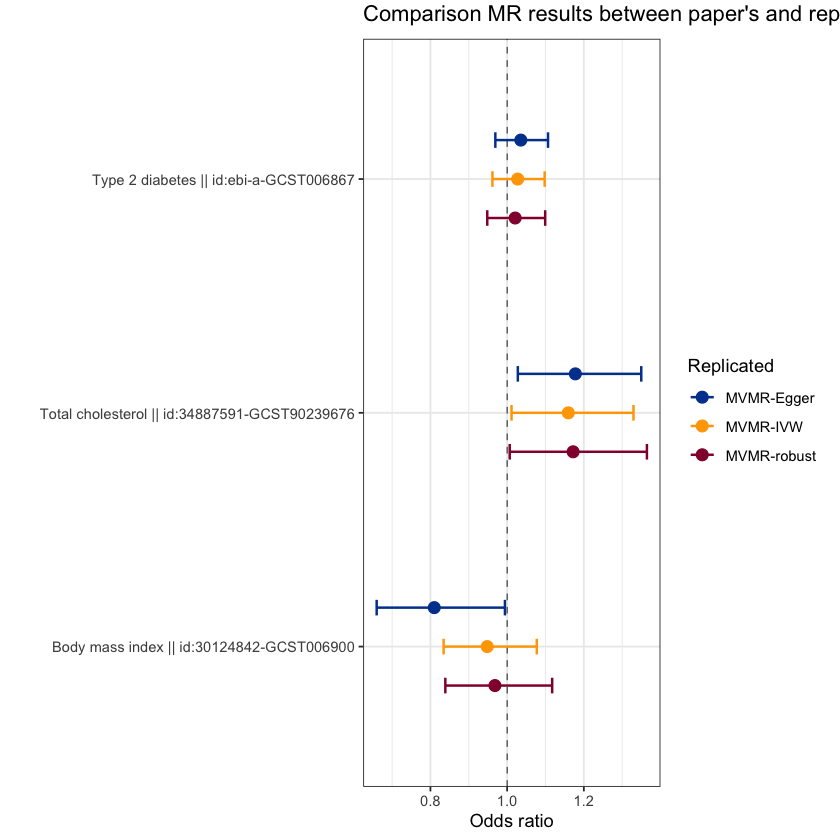

In [243]:
pos <- position_dodge(width = -.5)

p <- ggplot(df, aes(x = or, y = exposure, group = method, color = method)) + 
    geom_vline(aes(xintercept = 1.0), linewidth = .25, linetype = "dashed") + 
    geom_errorbarh(aes(xmax = df[,'or_uci95'], xmin = df[,'or_lci95']), size = .7, height = .2, position=pos) +
    geom_point(position=pos, size = 3) +
    
    #scale_x_log10(breaks = c(0.7,0.9,1.0,1.1,1.2,1.5), labels = c(0.7,0.9,1.0,1.1,1.2,1.5), limits = c(0.7,1.5)) +
    
    ylab("") +
    xlab("Odds ratio") +

    scale_colour_manual(values = c("#00429d", '#ffa600', "#93003a")) +
    guides(colour = guide_legend(title = "Replicated", reverse = FALSE)) +
    
    #annotate(geom = "text", y =1.1, x = log10(1.5), label = "", size = 1.5, hjust = 0) + 
    ggtitle("Comparison MR results between paper's and replication for Parkinson's Disease") +

    theme_bw() +
    theme(plot.title = element_text(vjust = 2))

print(p)

In [42]:
res_robust$mv <- TRUE
res_mv$mv <- FALSE
res_egger$mv <- TRUE

In [ ]:
export_mvmr_plot(res_robust, res_mv, FALSE,
                model_names = c('TRUE' = "MVMR-Robust", 'FALSE' = "MVMR-IVW"),
                colors = c("purple", "blue"))

In [ ]:
res <- export_mvmr_plot(res_egger, res_mv, FALSE,
                model_names = c('TRUE' = "MVMR-Egger", 'FALSE' = "MVMR-IVW"),
                colors = c("darkgreen", "blue"))

## Conditionnal Weak Instrument Test

In [132]:
mv_dat <- dat_als$mv_dat

In [175]:
glimpse(mv_dat)

List of 8
 $ exposure_beta: num [1:323, 1:3] -0.0223 -0.0006 -0.0325 0.0014 0.0201 0.0133 -0.01 -0.0019 0.0097 -0.0124 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:323] "rs10132280" "rs1014283" "rs10182181" "rs10242866" ...
  .. ..$ : chr [1:3] "30124842-GCST006900" "34887591-GCST90239676" "ebi-a-GCST006867"
 $ exposure_pval: num [1:323, 1:3] 5.6e-35 7.9e-01 6.7e-90 4.3e-01 1.7e-09 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:323] "rs10132280" "rs1014283" "rs10182181" "rs10242866" ...
  .. ..$ : chr [1:3] "30124842-GCST006900" "34887591-GCST90239676" "ebi-a-GCST006867"
 $ exposure_se  : num [1:323, 1:3] 0.0018 0.0021 0.0016 0.0018 0.0033 0.0017 0.0017 0.0017 0.0016 0.0017 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:323] "rs10132280" "rs1014283" "rs10182181" "rs10242866" ...
  .. ..$ : chr [1:3] "30124842-GCST006900" "34887591-GCST90239676" "ebi-a-GCST006867"
 $ outcome_beta : num [1:323] -0.0121 -0.0186 -0.0084 0.0099 -0.0149 -0.0014 -0.0117 0.02

In [176]:
mvmr_dat <- MVMR::format_mvmr(BXGs = mv_dat$exposure_beta, BYG = mv_dat$outcome_beta, 
                                seBXGs = mv_dat$exposure_se, seBYG = mv_dat$outcome_se,
                                RSID = attributes(mv_dat$exposure_beta)$dimnames[[1]])

In [177]:
exp_names <- mv_dat$expname
rownames(exp_names) <- lapply(1:dim(exp_names)[1], function(i) paste0("X", i))
exp_names

,id.exposure,exposure
,<chr>,<chr>
X1,30124842-GCST006900,Body mass index || id:30124842-GCST006900
X2,34887591-GCST90239676,Total cholesterol || id:34887591-GCST90239676
X3,ebi-a-GCST006867,Type 2 diabetes || id:ebi-a-GCST006867


In [178]:
trait_correspondance

trait1                  trait2                  trait3 
  "30124842-GCST006900" "34887591-GCST90239676"      "ebi-a-GCST006867"

In [179]:
head(mvmr_dat)

,SNP,betaYG,sebetaYG,betaX1,betaX2,betaX3,sebetaX1,sebetaX2,sebetaX3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs10132280,rs10132280,-0.0121,0.0122,-0.0223,0.000656788,-0.0374,0.0018,0.00147010,0.0079
rs1014283,rs1014283,-0.0186,0.0143,-0.0006,-0.014021900,0.0047,0.0021,0.00173527,0.0093
rs10182181,rs10182181,-0.0084,0.0110,-0.0325,0.000158148,-0.0086,0.0016,0.00134190,0.0072
rs10242866,rs10242866,0.0099,0.0112,0.0014,-0.010409400,-0.0041,0.0018,0.00137157,0.0080
rs10247983,rs10247983,-0.0149,0.0210,0.0201,-0.001411430,0.0253,0.0033,0.00253487,0.0150
rs10269783,rs10269783,-0.0014,0.0119,0.0133,0.001499760,0.0128,0.0017,0.00137910,0.0074


In [211]:
S_YY

,trait1,trait2,trait3
,<dbl>,<dbl>,<dbl>
trait1,1.00000000,-0.06933753,0.5278856
trait2,-0.06933753,1.00000000,-0.1617912
trait3,0.52788562,-0.16179123,1.0000000


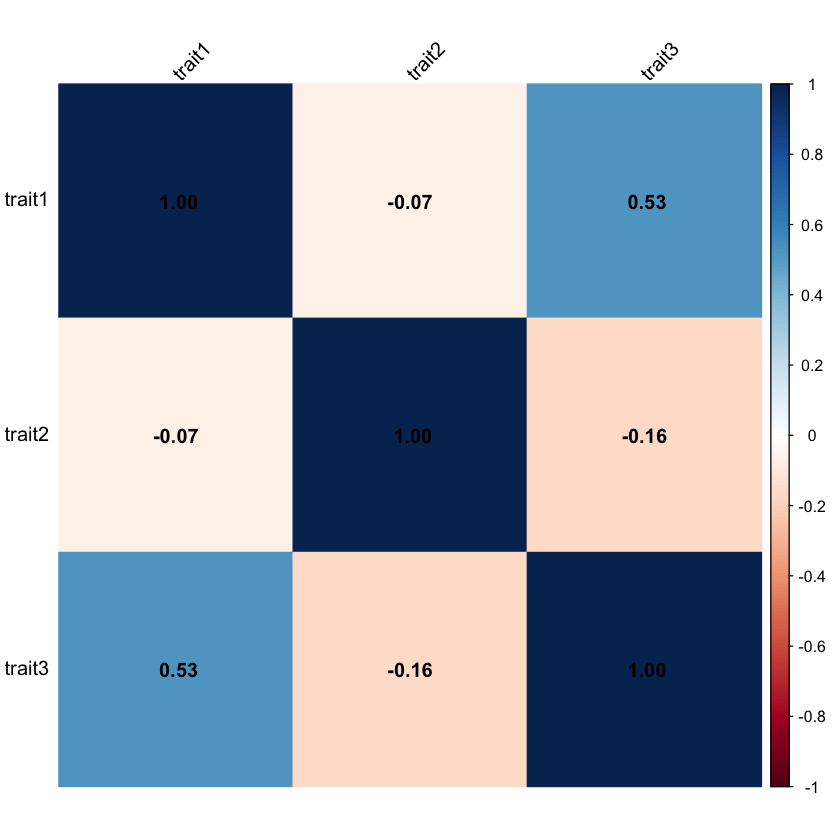

In [227]:
library(corrplot)
corrplot(as.matrix(S_YY), method = 'color', cl.pos = 'r', addCoef.col = 'black', tl.col = 'black', tl.srt = 45)

In [201]:
Xcovmat <- MVMR::phenocov_mvmr(Pcov = S_YY, seBXGs = mvmr_dat[, c('sebetaX1', 'sebetaX2', 'sebetaX3')]) %>%
    lapply(FUN = as.matrix)

In [202]:
strength_mvmr(r_input = mvmr_dat, gencov = Xcovmat)


Conditional F-statistics for instrument strength

            exposure1 exposure2 exposure3
F-statistic  39.22337  61.84805  11.49867


,exposure1,exposure2,exposure3
,<dbl>,<dbl>,<dbl>
F-statistic,39.22337,61.84805,11.49867


In [229]:
pleiotropy_mvmr(r_input = mvmr_dat, gencov = Xcovmat)

Q-Statistic for instrument validity:
454.0461 on 319 DF , p-value: 9.569603e-07


In [231]:
exp_names

,id.exposure,exposure
,<chr>,<chr>
X1,30124842-GCST006900,Body mass index || id:30124842-GCST006900
X2,34887591-GCST90239676,Total cholesterol || id:34887591-GCST90239676
X3,ebi-a-GCST006867,Type 2 diabetes || id:ebi-a-GCST006867


In [230]:
ivw_mvmr(r_input = mvmr_dat)

Warning message in ivw_mvmr(r_input = mvmr_dat):
“Covariance between effect of genetic variants on each exposure not specified. Fixing covariance at 0.”



Multivariable MR

             Estimate Std. Error    t value   Pr(>|t|)
exposure1 -0.05041047 0.06436623 -0.7831820 0.43409949
exposure2  0.14567659 0.06916936  2.1060856 0.03597548
exposure3  0.02650007 0.03368047  0.7868082 0.43197647

Residual standard error: 1.191 on 320 degrees of freedom




,Estimate,Std. Error,t value,Pr(>|t|)
exposure1,-0.05041047,0.06436623,-0.7831820,0.43409949
exposure2,0.14567659,0.06916936,2.1060856,0.03597548
exposure3,0.02650007,0.03368047,0.7868082,0.43197647


In [232]:
qhet_mvmr(r_input = mvmr_dat, pcor = S_YY, CI = TRUE, iterations = 100)

Warning message in qhet_mvmr(r_input = mvmr_dat, pcor = S_YY, CI = FALSE, iterations = 100):
“qhet_mvmr() is currently undergoing development.”


,Effect Estimates
,<dbl>
Exposure 1,-0.05199349
Exposure 2,0.20556080
Exposure 3,0.02389919


In [253]:
mr_mvegger(object = mr_mvinput(bx = mv_dat$exposure_beta, 
                                bxse = mv_dat$exposure_se,
                                by = mv_dat$outcome_beta,
                                byse = mv_dat$outcome_se),
            orientate = 1,
            correl = FALSE,
            distribution = "normal",
            alpha = 0.05)


Multivariable MR-Egger method
(variants uncorrelated, random-effect model)

Orientated to exposure : 1 
Number of Variants : 323 
------------------------------------------------------------------
    Exposure Estimate Std Error  95% CI        p-value
  exposure_1   -0.211     0.105 -0.416, -0.006   0.044
  exposure_2    0.164     0.069  0.027,  0.300   0.019
  exposure_3    0.035     0.034 -0.031,  0.101   0.301
 (intercept)    0.003     0.001  0.000,  0.006   0.052
------------------------------------------------------------------
Residual standard error =  1.186 
Heterogeneity test statistic = 448.9604 on 319 degrees of freedom, (p-value = 0.0000)

### Estimating phenotypic correlation

In [156]:
b <- dat_als$mv_dat$exposure_beta
se <- dat_als$mv_dat$exposure_se
rsid = attributes(mv_dat$exposure_beta)$dimnames[[1]]

In [149]:
allele_dat <- unique(bind_rows(lapply(dat_als$uv_dat, function(df) {
    id <- df$id.exposure[1]
    # Extract SNP data selected in MV analysis
    df <- df[,c("SNP", "effect_allele.exposure", "other_allele.exposure", "beta.exposure")] %>%
        filter(SNP %in% rsid)
    beta_mv <- b[rownames(b) %in% df$SNP, id]
    # Check if alleles need to be flipped
    df$flip <- (df$beta.exposure * beta_mv) < 0
    # Swap alleles if necessary
    df %>%
        mutate(effect_allele.exposure_new = ifelse(flip, other_allele.exposure, effect_allele.exposure),
               other_allele.exposure = ifelse(flip, effect_allele.exposure, other_allele.exposure),
               effect_allele.exposure = effect_allele.exposure_new) %>%
        select(-effect_allele.exposure_new, -beta.exposure, -flip)
    })))
rownames(allele_dat) <- allele_dat$SNP
allele_dat$SNP <- NULL
colnames(allele_dat) <- c("allele_0", "allele_1")
head(allele_dat)

,allele_0,allele_1
,<chr>,<chr>
rs10132280,A,C
rs10182181,A,G
rs10247983,A,G
rs10269783,A,G
rs10478110,A,C
rs10733051,A,G


In [157]:
trait_correspondance <- c('trait1' = '30124842-GCST006900', 'trait2' = '34887591-GCST90239676', 'trait3' = 'ebi-a-GCST006867')
colnames(b) <- lapply(1:dim(b)[2], function(i) paste0("trait", i, '_b'))
colnames(se) <- lapply(1:dim(b)[2], function(i) paste0("trait", i, '_se'))
head(b)
head(se)

,trait1_b,trait2_b,trait3_b
rs10132280,-0.0223,0.000656788,-0.0374
rs1014283,-0.0006,-0.014021900,0.0047
rs10182181,-0.0325,0.000158148,-0.0086
rs10242866,0.0014,-0.010409400,-0.0041
rs10247983,0.0201,-0.001411430,0.0253
rs10269783,0.0133,0.001499760,0.0128


,trait1_se,trait2_se,trait3_se
rs10132280,0.0018,0.00147010,0.0079
rs1014283,0.0021,0.00173527,0.0093
rs10182181,0.0016,0.00134190,0.0072
rs10242866,0.0018,0.00137157,0.0080
rs10247983,0.0033,0.00253487,0.0150
rs10269783,0.0017,0.00137910,0.0074


In [167]:
# Create a new data frame by interleaving columns of b and se
interleaved_df <- data.frame(matrix(ncol = 2 * ncol(b), nrow = nrow(b)))

# Assign column names
colnames(interleaved_df) <- as.vector(rbind(colnames(b), colnames(se)))

# Fill the interleaved data frame
for (i in 1:ncol(b)) {
    interleaved_df[, 2 * i - 1] <- b[, i]
    interleaved_df[, 2 * i] <- se[, i]
}

In [168]:
S_XY <- bind_cols(allele_dat, interleaved_df)
S_XY$allele_0 <- as.factor(S_XY$allele_0)
S_XY$allele_1 <- as.factor(S_XY$allele_1)

In [169]:
head(S_XY)

,allele_0,allele_1,trait1_b,trait1_se,trait2_b,trait2_se,trait3_b,trait3_se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs10132280,A,C,-0.0223,0.0018,0.000656788,0.00147010,-0.0374,0.0079
rs10182181,A,G,-0.0006,0.0021,-0.014021900,0.00173527,0.0047,0.0093
rs10247983,A,G,-0.0325,0.0016,0.000158148,0.00134190,-0.0086,0.0072
rs10269783,A,G,0.0014,0.0018,-0.010409400,0.00137157,-0.0041,0.0080
rs10478110,A,C,0.0201,0.0033,-0.001411430,0.00253487,0.0253,0.0150
rs10733051,A,G,0.0133,0.0017,0.001499760,0.00137910,0.0128,0.0074


In [170]:
##estimate phenotypic correlation matrix using metaCCA 
S_YY <- estimateSyy(S_XY = S_XY)
head(S_YY)

,trait1,trait2,trait3
trait1,1.00000000,-0.06933753,0.5278856
trait2,-0.06933753,1.00000000,-0.1617912
trait3,0.52788562,-0.16179123,1.0000000


In [172]:
out_ntests <-"out_ntests.txt"
S_YY<-as.data.frame(S_YY)
SpD(phenocorr=S_YY, out=out_ntests)